In [1]:
!wget --show-progress 'https://d3js.org/d3.v3.js'
!pip install --upgrade jinja2==3.0.3
from IPython.core.display import HTML
HTML('<script src="d3.v3.js"></script>')

--2023-06-01 00:09:42--  https://d3js.org/d3.v3.js
Resolving d3js.org (d3js.org)... 172.67.73.126, 104.26.7.30, 104.26.6.30, ...
Connecting to d3js.org (d3js.org)|172.67.73.126|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/javascript]
Saving to: ‘d3.v3.js’

d3.v3.js                [ <=>                ] 330.02K  --.-KB/s    in 0.1s    

2023-06-01 00:09:42 (2.45 MB/s) - ‘d3.v3.js’ saved [337945]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 KB 4.9 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 3.1.1
    Uninstalling Jinja2-3.1.1:
      Successfully uninstalled Jinja2-3.1.1


In [2]:
!pip install lxml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 41.3 MB/s eta 0:00:0000:0100:01


In [3]:
!pip install --upgrade --user pixiedust

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 197.6/197.6 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.9/93.9 KB 16.1 MB/s eta 0:00:00
  Created wheel for pixiedust: filename=pixiedust-1.1.19-py3-none-any.whl size=321801 sha256=799382b2100462b582069cc73beb9ddb01e4319f2849855bdc57f47a43f05230
  Stored in directory: /home/jovyan/.cache/pip/wheels/77/d4/e1/a85b6f570da64ab83b7a9d9ac0353f6d0592c60a31099208c7
Successfully built pixiedust
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Restart kernel now

In [1]:
import pixiedust

Pixiedust database opened successfully
Table VERSION_TRACKER created successfully
Table METRICS_TRACKER created successfully

Share anonymous install statistics? (opt-out instructions)

PixieDust will record metadata on its environment the next time the package is installed or updated. The data is anonymized and aggregated to help plan for future releases, and records only the following values:

{
   "data_sent": currentDate,
   "runtime": "python",
   "application_version": currentPixiedustVersion,
   "space_id": nonIdentifyingUniqueId,
   "config": {
       "repository_id": "https://github.com/ibm-watson-data-lab/pixiedust",
       "target_runtimes": ["Data Science Experience"],
       "event_id": "web",
       "event_organizer": "dev-journeys"
   }
}
You can opt out by calling pixiedust.optOut() in a new cell.


Pixiedust runtime updated. Please restart kernel
Table USER_PREFERENCES created successfully
Table service_connections created successfully


## Restart kernel now

In [1]:
import os
#download graphframes package
!wget -q --show-progress http://repos.spark-packages.org/graphframes/graphframes/0.8.1-spark2.4-s_2.12/:graphframes-0.8.1-spark2.4-s_2.12.jar -P /home/jovyan/
#tell to load graphframes and dependencies to the spark cluster for use
os.environ["PYSPARK_SUBMIT_ARGS"] = '--repositories "http://repos.spark-packages.org" --packages graphframes:graphframes:0.8.1-spark2.4-s_2.12 --jars /home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-api_2.12-2.1.2.jar,/home/jovyan/.ivy2/jars/org.scala-lang_scala-reflect-2.12.0.jar,/home/jovyan/.ivy2/jars/com.typesafe.scala-logging_scala-logging-slf4j_2.12-2.1.2.jar,/home/jovyan/.ivy2/jars/org.slf4j_slf4j-api-1.7.7.jar,/home/jovyan/.ivy2/jars/graphframes_graphframes-0.8.1-spark2.4-s_2.12.jar pyspark-shell'

In [2]:
import pyspark
from pyspark.sql import *

try:
    sc = pyspark.SparkContext('local[*]',environment = {})
except:
    sc = sc
#create sqlcontext on the spark, enables the use of the SQL queries below
sqlContext = SQLContext(sc)

import pixiedust     #important, pixiedust must be initialized after pyspark, otherwise it just doesn't work right

/usr/local/spark/python/pyspark/sql/context.py:77: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Pixiedust database opened successfully


Table SPARK_PACKAGES created successfully


In [ ]:
# Create a Vertex DataFrame with unique ID column "id"
v = sqlContext.createDataFrame([
  ("a", "Aval"),
  ("b", "Bval"),
  ("c", "Cval"),
  ("d", "Dval"),
], ["id", "value"])
# Create an Edge DataFrame with "src" and "dst" columns
e = sqlContext.createDataFrame([
  ("a", "b", 1),
  ("b", "d", 1),    
], ["src", "dst", "somevalue"])
# Create a GraphFrame
#import pixiedust
from graphframes import *
g = GraphFrame(v, e)

display(g)

# Ex 5.1

### Task 1

Modify the code above to form the graph that is shown in the mining massive datasets book link analysis chapter figure 5.1 (figure below). Additionally, give random numbers to the edges (replace corresponding 1 in each row  like (“a”,”b”,1)).  

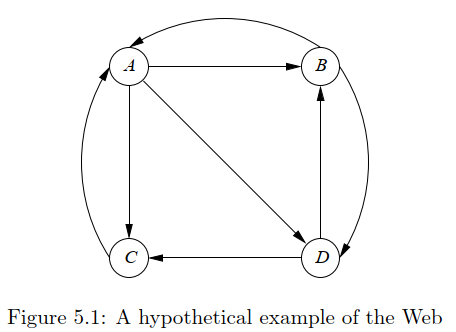

In [ ]:
import random

# Create a Vertex DataFrame with unique ID column "id"
v = sqlContext.createDataFrame([
  ("A", "A"),
  ("B", "B"),
  ("C", "C"),
  ("D", "D"),
], ["id", "value"])

# Create an Edge DataFrame with "src", "dst", and "weight" columns
e = sqlContext.createDataFrame([
  ("A", "B", random.random()),
  ("A", "C", random.random()),
  ("A", "D", random.random()),
  ("D", "B", random.random()),
  ("D", "C", random.random()),
  ("C", "A", random.random()),
  ("B", "D", random.random()),
  ("B", "A", random.random()),
], ["src", "dst", "weight"])

# Create a GraphFrame
from graphframes import GraphFrame
g = GraphFrame(v, e)

display(g)

### Task 2

Calculate PageRank (use new code block) for this matrix using resetProbability values of 0.2, 0.01 and 0.0001. Did the pageRank change? 

In [5]:
# Run PageRank algorithm with resetProbability = 0.2 and maxIter = 20
results_0_2 = g.pageRank(resetProbability=0.2, maxIter=20)
results_0_2.vertices.select("id", "pagerank").sort("id").show()

# Run PageRank algorithm with resetProbability = 0.01 and maxIter = 20
results_0_01 = g.pageRank(resetProbability=0.01, maxIter=20)
results_0_01.vertices.select("id", "pagerank").sort("id").show()

# Run PageRank algorithm with resetProbability = 0.0001 and maxIter = 20
results_0_0001 = g.pageRank(resetProbability=0.0001, maxIter=20)
results_0_0001.vertices.select("id", "pagerank").sort("id").show()

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A| 1.285714282572824|
|  B|0.9047619058090588|
|  C|0.9047619058090588|
|  D|0.9047619058090588|
+---+------------------+

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A|1.3311034206633208|
|  B|0.8896321931122266|
|  C|0.8896321931122266|
|  D|0.8896321931122266|
+---+------------------+

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A|1.3333107931352375|
|  B|0.8888964022882543|
|  C|0.8888964022882543|
|  D|0.8888964022882543|
+---+------------------+



##### Yes, the PageRank values have changed for each reset probability value.

### Task 3

Calculate PageRank for matrix in course book figure 5.3 using resetProbability values of 0.2, 0.01 and 0.0001. How did the pageRank change in this case? What is the purpose of resetProbability (teleportation in book) constant in the matrix equation? (See 5.1.5 Spider traps and taxation in the course book.) 

In [6]:
# Create a Vertex DataFrame with unique ID column "id"
v = sqlContext.createDataFrame([
  ("A", "value1"),
  ("B", "value2"),
  ("C", "value3"),
  ("D", "value3"),
], ["id", "value"])

# Create an Edge DataFrame with "src" and "dst" columns
e = sqlContext.createDataFrame([
  ("A", "B", random.random()),
  ("A", "C", random.random()),
  ("A", "D", random.random()),
  ("D", "B", random.random()),
  ("D", "C", random.random()),
  ("B", "D", random.random()),
  ("B", "A", random.random()),
], ["src", "dst", "weight"])

# Create a GraphFrame
from graphframes import GraphFrame
g = GraphFrame(v, e)

# Calculate PageRank with resetProbability = 0.2 and maxIter = 20
results_0_2 = g.pageRank(resetProbability=0.2, maxIter=20)
results_0_2.vertices.select("id", "pagerank").sort("id").show()

# Calculate PageRank with resetProbability = 0.01 and maxIter = 20
results_0_01 = g.pageRank(resetProbability=0.01, maxIter=20)
results_0_01.vertices.select("id", "pagerank").sort("id").show()

# Calculate PageRank with resetProbability = 0.0001 and maxIter = 20
results_0_0001 = g.pageRank(resetProbability=0.0001, maxIter=20)
results_0_0001.vertices.select("id", "pagerank").sort("id").show()

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A|0.8333313379457287|
|  B| 1.055556220684757|
|  C| 1.055556220684757|
|  D| 1.055556220684757|
+---+------------------+

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A|0.7994431119598119|
|  B| 1.066852296013396|
|  C| 1.066852296013396|
|  D| 1.066852296013396|
+---+------------------+

+---+------------------+
| id|          pagerank|
+---+------------------+
|  A|0.7540418095886433|
|  B|1.0819860634704521|
|  C|1.0819860634704521|
|  D|1.0819860634704521|
+---+------------------+



##### The PageRank values changed for different reset probability values. Lower reset probabilities distribute importance more evenly among the nodes, resulting in relatively higher PageRank values for some nodes. Higher reset probabilities concentrate importance on the initial node, leading to a higher PageRank value for that node. The resetProbability constant (teleportation probability) in the matrix equation introduces randomness, preventing the algorithm from getting stuck and improving the robustness and convergence of PageRank. Its purpose is to ensure the algorithm explores the entire graph and handles scenarios like spider traps, providing more accurate and fair rankings.

# Ex 5.2 Social network graph

Upload and unzip e4_data.zip file in console. Or unzip files locally and upload files to notebook.

### Task 1

Run the code below and try to inspect the graph and the table, if the key users (graph vertices) could be found using the PageRank algorithm. Select bidirect graph from pixiedust plot menu and set max edges to 1000 and press update. You can drag nodes to see slightly better how they are connected. 

In [ ]:
#read graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0]) )
vertices = sqlContext.createDataFrame(vertices)    

# Create a GraphFrame
from graphframes import *
g = GraphFrame(vertices, edges)

#calculate pagerank
pagerank = g.pageRank(resetProbability=0.01, maxIter=20)
degrees = g.degrees

#join two results
result = pagerank.vertices.join(degrees,"id")
#print
result.select("name","pagerank","degree").orderBy("pagerank", ascending=False).show(100,False)

display(pagerank)

### Task 2

Is the PageRank algorithm any better than just counting edges (graph degree) to find the most important vertices of the network? Give some examples which user ids you think are important by visual inspection, and in pagerank or degree. (For some analyses a vertex can be important if it connects network parts that would be isolated without the connecting vertex.) 

Answer: The PageRank algorithm is more effective than simply counting edges (graph degree) to identify important vertices in a network. PageRank considers both the number and quality of connections, while degree only measures the number of connections.
In the provided code, PageRank is calculated using g.pageRank(), and the graph degree is obtained using g.degrees. By comparing the results, we can identify important vertices based on PageRank and degree.

To identify important vertices visually, consider the following:
High PageRank: These vertices are frequently visited or referenced in the network.
High degree: These vertices have many connections to other vertices, facilitating overall network connectivity.

To see the results, check the output of result.select("name", "pagerank", "degree").orderBy("pagerank", ascending=False).show(100, False). This displays the names, PageRank scores, and degrees of the top vertices in descending order of PageRank.

# Ex 5.3 Analyzing social network clustering 

A graph can be split into clusters by the connectivity, contents or with both connectivity and contents of the graph. In social network graphs individuals may belong into many groups or communities so the clustering is not strictly defined for this kind of data. 
A graph can be partitioned in many ways and the graph partition problem is NP hard to find the best partition. A big computation cluster seems to be the only way to find good solution for large graphs quickly. As seen in the course book chapter Mining Social-Network Graphs, there is many different graph clustering/partitioning/grouping algorithms available. 
In the following code, Label Propagation Algorithm is used to cluster communities. Start with the uploaded data files from the last example. 

Sadly, we cannot easily plot this with pixiedust, so I had to revert to old deprecated plot. Please ignore warnings. Maybe things get improved next year.

In [ ]:
res.show()

<IPython.core.display.Javascript object>


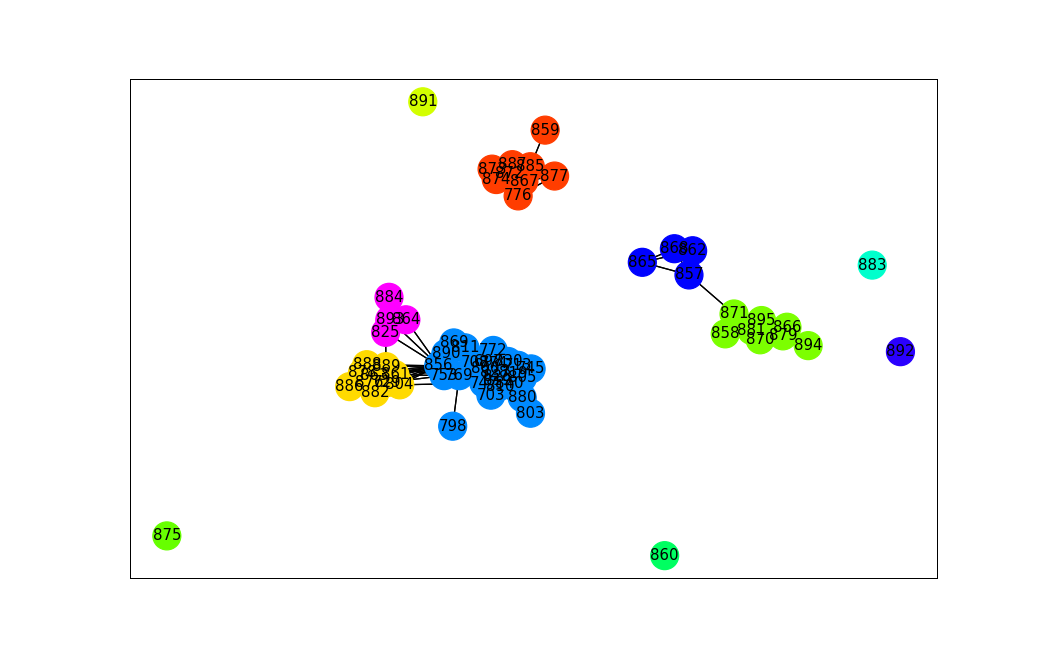

In [9]:
%matplotlib notebook

import networkx as nx
import matplotlib.pyplot as plt
import numpy as nb

#readn graph edges(or arcs, lines) (multiple edges per vertex can exist)
lines = sc.textFile("698.edges")
edges = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row( src=int(p[0]), dst=int(p[1])) )
edges = sqlContext.createDataFrame(edges)

#read graph vertices(or nodes, points) (these are unique)
lines = sc.textFile("698.feat")
vertices = lines.map(lambda l: l.split(" ")). \
            map(lambda p: Row(id=int(p[0]), name="userid_"+p[0] ,features=[int(x) for x in p[1:]] ))
vertices = sqlContext.createDataFrame(vertices)    

# Create a GraphFrame
from graphframes import *
g = GraphFrame(vertices, edges)

#calculate simple clustering with the label propagation clustering alg.
lpa = g.labelPropagation(maxIter=5)
nodes = lpa.select("id","label")

#plotting, generate unique colors for each group -----------------------
G = nx.DiGraph()
for x in g.edges.collect():
    G.add_edges_from([(x[0],x[1])], weight=1)
for x in lpa.select("id","label").rdd.map(lambda r: ( int(r[0]),int(r[1])) ).collect():
    G.add_node(x[0],label=x[1])
grouplabels = [list(x[1].values())[0] for x in G.nodes(True)]
node_texts = {node:node for node in G.nodes()};
cmap = plt.get_cmap('gist_rainbow')
uniqlabels = nb.unique(grouplabels)
randvals = nb.random.random_sample((len(uniqlabels),1))
colorlut = dict(zip(uniqlabels,randvals))  
gcolors = []
for x in grouplabels:
    gcolors.append(cmap(float(colorlut[x])))
positions=nx.spring_layout(G,k=0.1,scale=1.5,iterations=20)
nx.draw_networkx(G,positions, labels=node_texts, node_color = gcolors, node_size=500,arrows=False)
#plotting end ----------------------------------------------------------

### Task 1
Examine graph and try to count how many clusters LPA generated.

Answer: There are a few clusters (more than eight) that LPA has generated. 

### Task 2

In the next phase we analyze if our individuals in our clusters have some features that are common for them. Add and run following code. Try to make histogram plot with pixiedust (try bar chart with count aggregation) pos = x-axis, col=y-axis. Finally show all labeled clusters by selecting “Cluster by” label.


In [ ]:
#line code explodes features into key values and duplicates label and ids
from pyspark.sql.functions import posexplode
#remove zeros from features to make histogram plotting easier
res = lpa.select('id','label',posexplode(lpa.features)).filter("col>0")
display(res)

### Task 3

Import feature names from the corresponding .featnames ending filename. Give the id number column name “pos” and feature name “featname” to ease join operation. Please also concatenate the last number from each featurename line to the end of featname. Do a join into “res” dataFrame with “pos” column. Finally modify bar graph to display feature names on histogram x-axis. 

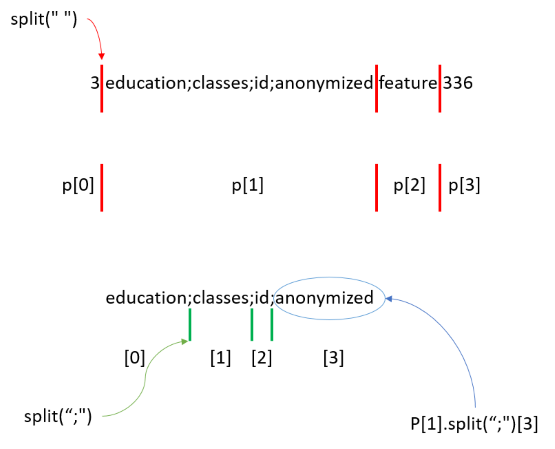

- hint_1: in the previous map function, the lines are split at the white spaces (" "). So now you need to assign the different parts to different columns within a Row(...). Decide on column names to use and feed them (using indexing as displayed in figure above) the appropriate information from a line. The task requires you to assign the id value (first number of the line) to a column named "pos"
- hint_2: __[https://kb.databricks.com/data/join-two-dataframes-duplicated-columns.html](https://kb.databricks.com/data/join-two-dataframes-duplicated-columns.html)__


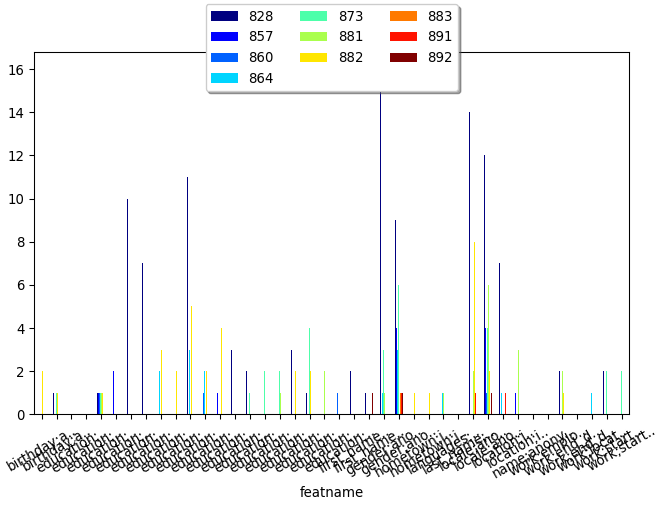

In [ ]:
from pyspark.sql.functions import posexplode

# Explode features into key values and duplicate label and ids
res = lpa.select('id', 'label', posexplode(lpa.features)).filter("col > 0")

# Import feature names from the corresponding .featnames file
featnames_lines = sc.textFile("698.featnames")
featnames = featnames_lines.map(lambda l: l.split(" ")).map(lambda p: Row(pos=int(p[0]), featname=" ".join(p[1:]) + " " + p[-1]))
featnames_df = sqlContext.createDataFrame(featnames)

# Join the "res" DataFrame with the "featnames" DataFrame based on the "pos" column
joined_res = res.join(featnames_df, "pos")

# Modify bar graph to display feature names on histogram x-axis
import pixiedust
display(joined_res)

### Task 4

Do you see any distinguishing patterns in the pixiedust plots? Do all label groups form meaningful histograms for analysis (enough data)? You can expand the names by ticking “stretch image” checkbox. 

Answer:
The histograms we made using pixiedust show different patterns that help us see differences between the groups of labels. Some groups have clear peaks or clusters in their histograms, which means that the individuals in those groups have similar features. However, not all groups have enough data or noticeable differences in features, so their histograms may not give us much useful information. When we expand the feature names, we can better understand how important those features are in explaining the patterns we see. It's important to think about these findings in the context of the specific data and what we already know about the subject.

### Task 5

Describe what the following code prints out. Requires task 3 to be completed! 

In [ ]:
uniqvals = res.select('label').distinct().rdd.map(lambda p: p[0]).collect()
res.persist() #looping queries following, store intermediate data
for x in uniqvals:
    print("Group: " + str(x) + "\n")
    ures = res.filter('label=' + str(x)).groupBy("featname").sum("col").sort("sum(col)",ascending=False).rdd.map(lambda p: (p[0],p[1])).take(10)
    print(ures)
    print('\n')

##### The code prints the results of a data analysis for each unique label in the 'res' DataFrame. It filters the DataFrame based on the label, groups the data by feature name, calculates the sum of a column, and sorts the groups.

# Ex5.4 Visualize flight routes data as graph (optional)

### Task 1

With the routes.dat and airports.dat already introduces in the exercise document 2, construct a graph that visualizes the flight route network. You can also reuse parts of the exercise code to import dataFrames! Remember to set source and destination names (like ‘LAX’) to src and dst columns. While importing airports.dat set airport name to id column (id column should also have three letter ids’ like ‘LAX’).
Run display command on the graph now and select max vertices as 1000. Now you may notice that your plot result is total nonsense, because the plot cannot handle all vertices and edges. Too much data to view is a common problem in data analysis and a big part of data mining is all about how to condense your result small enough to be understandable for target audience. 

In [27]:
from graphframes import GraphFrame
from pyspark.sql import SparkSession, Row

# Create SparkSession
spark = SparkSession.builder.appName("Flight Route Network").getOrCreate()

# Read airports.dat file and create vertices DataFrame
airports_lines = spark.sparkContext.textFile("airports.dat")
airports_data = airports_lines.map(lambda l: l.split(",")).map(lambda p: Row(id=p[4], name=p[1]))
vertices_df = spark.createDataFrame(airports_data)

# Read routes.dat file and create edges DataFrame
routes_lines = spark.sparkContext.textFile("routes.dat")
routes_data = routes_lines.map(lambda l: l.split(",")).map(lambda p: Row(src=p[2], dst=p[4]))
edges_df = spark.createDataFrame(routes_data)

# Create GraphFrame
g = GraphFrame(vertices_df, edges_df)

# Visualize the graph
g.vertices.show()
g.edges.show()

# Stop SparkSession
spark.stop()


+-----+--------------------+
|   id|                name|
+-----+--------------------+
|"GKA"|    "Goroka Airport"|
|"MAG"|    "Madang Airport"|
|"HGU"|"Mount Hagen Kaga...|
|"LAE"|    "Nadzab Airport"|
|"POM"|"Port Moresby Jac...|
|"WWK"|"Wewak Internatio...|
|"UAK"|"Narsarsuaq Airport"|
|"GOH"|"Godthaab / Nuuk ...|
|"SFJ"|"Kangerlussuaq Ai...|
|"THU"|    "Thule Air Base"|
|"AEY"|  "Akureyri Airport"|
|"EGS"|"Egilsstaðir Airp...|
|"HFN"|"Hornafjörður Air...|
|"HZK"|   "Húsavík Airport"|
|"IFJ"|"Ísafjörður Airport"|
|"KEF"|"Keflavik Interna...|
|"PFJ"|"Patreksfjörður A...|
|"RKV"| "Reykjavik Airport"|
|"SIJ"|"Siglufjörður Air...|
|"VEY"|"Vestmannaeyjar A...|
+-----+--------------------+
only showing top 20 rows

+---+---+
|src|dst|
+---+---+
|AER|KZN|
|ASF|KZN|
|ASF|MRV|
|CEK|KZN|
|CEK|OVB|
|DME|KZN|
|DME|NBC|
|DME|TGK|
|DME|UUA|
|EGO|KGD|
|EGO|KZN|
|GYD|NBC|
|KGD|EGO|
|KZN|AER|
|KZN|ASF|
|KZN|CEK|
|KZN|DME|
|KZN|EGO|
|KZN|LED|
|KZN|SVX|
+---+---+
only showing top 20 rows



### Task 2

Add Airline id to the edges while importing data and then find a way to filter edges in a way that only one airline is present on the graph. Airline ids are on the first column in the routes.dat. Try at first the “2B” airline.

In [30]:
from graphframes import GraphFrame
from pyspark.sql import SparkSession, Row

# Create SparkSession
spark = SparkSession.builder.appName("Flight Route Network").getOrCreate()

# Read airports.dat file and create vertices DataFrame
airports_lines = spark.sparkContext.textFile("airports.dat")
airports_data = airports_lines.map(lambda l: l.split(",")).map(lambda p: Row(id=p[4], name=p[1]))
vertices_df = spark.createDataFrame(airports_data)

# Read routes.dat file and create edges DataFrame with airline ID
routes_lines = spark.sparkContext.textFile("routes.dat")
routes_data = routes_lines.map(lambda l: l.split(",")).map(lambda p: Row(src=p[2], dst=p[4], airline_id=p[0]))
edges_df = spark.createDataFrame(routes_data)

# Filter edges DataFrame to include only the desired airline (e.g., '2B')
filtered_edges_df = edges_df.filter(edges_df.airline_id == '2B')

# Create GraphFrame
g = GraphFrame(vertices_df, filtered_edges_df)

# Visualize the graph
g.vertices.show()
g.edges.show()

# Stop SparkSession
spark.stop()

+-----+--------------------+
|   id|                name|
+-----+--------------------+
|"GKA"|    "Goroka Airport"|
|"MAG"|    "Madang Airport"|
|"HGU"|"Mount Hagen Kaga...|
|"LAE"|    "Nadzab Airport"|
|"POM"|"Port Moresby Jac...|
|"WWK"|"Wewak Internatio...|
|"UAK"|"Narsarsuaq Airport"|
|"GOH"|"Godthaab / Nuuk ...|
|"SFJ"|"Kangerlussuaq Ai...|
|"THU"|    "Thule Air Base"|
|"AEY"|  "Akureyri Airport"|
|"EGS"|"Egilsstaðir Airp...|
|"HFN"|"Hornafjörður Air...|
|"HZK"|   "Húsavík Airport"|
|"IFJ"|"Ísafjörður Airport"|
|"KEF"|"Keflavik Interna...|
|"PFJ"|"Patreksfjörður A...|
|"RKV"| "Reykjavik Airport"|
|"SIJ"|"Siglufjörður Air...|
|"VEY"|"Vestmannaeyjar A...|
+-----+--------------------+
only showing top 20 rows

+---+---+----------+
|src|dst|airline_id|
+---+---+----------+
|AER|KZN|        2B|
|ASF|KZN|        2B|
|ASF|MRV|        2B|
|CEK|KZN|        2B|
|CEK|OVB|        2B|
|DME|KZN|        2B|
|DME|NBC|        2B|
|DME|TGK|        2B|
|DME|UUA|        2B|
|EGO|KGD|        2B|
|EGO|